In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# How Well do jobs and skill pay for Data Analysts?

## Methodology

1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills

In [2]:
df_CAN = df[df['job_country']=='Canada'].dropna(subset=['salary_year_avg']).copy()

In [4]:
job_titles = df_CAN['job_title_short'].value_counts().index[:6].tolist()

job_titles


['Data Engineer',
 'Senior Data Engineer',
 'Data Scientist',
 'Machine Learning Engineer',
 'Software Engineer',
 'Data Analyst']

In [9]:
df_CAN_top6 = df_CAN[df_CAN['job_title_short'].isin(job_titles)]

In [15]:
job_order = df_CAN_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

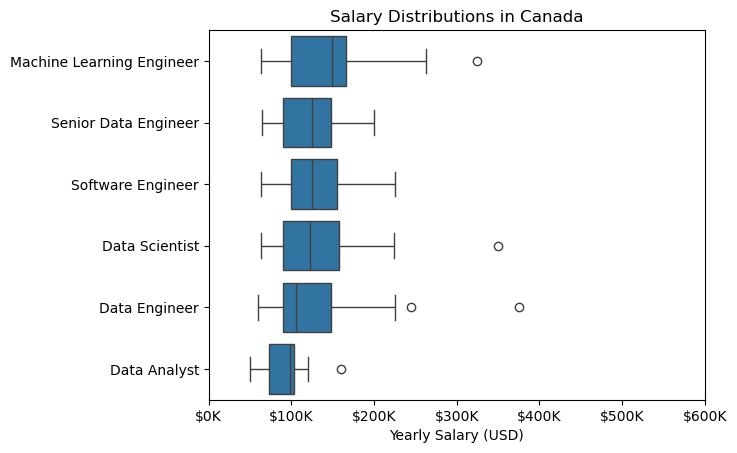

In [16]:
sns.boxplot(data = df_CAN_top6, x='salary_year_avg', y='job_title_short', order= job_order)
plt.title('Salary Distributions in Canada')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

# Investigate Median Salary vs Skill for Data Analysts

In [18]:
df_DA_CAN = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='Canada')].copy()

df_DA_CAN = df_DA_CAN.dropna(subset=['salary_year_avg'])

In [19]:
df_DA_CAN = df_DA_CAN.explode('job_skills')

In [27]:
df_DA_toppay = df_DA_CAN.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_toppay = df_DA_toppay.head(10)

df_DA_toppay

,count,median
job_skills,,
looker,2,130250.00
redshift,1,120000.00
snowflake,3,120000.00
hadoop,3,111175.00
spark,4,109795.25
typescript,1,108415.50
aws,2,105000.00
bigquery,3,105000.00
gcp,2,105000.00


In [26]:
df_DA_skills = df_DA_CAN.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
snowflake,3,120000.00
spark,4,109795.25
python,14,99825.00
sheets,4,99500.00
sql,17,99150.00
tableau,10,98825.00
excel,9,98500.00
sas,8,98500.00
vba,4,84500.00


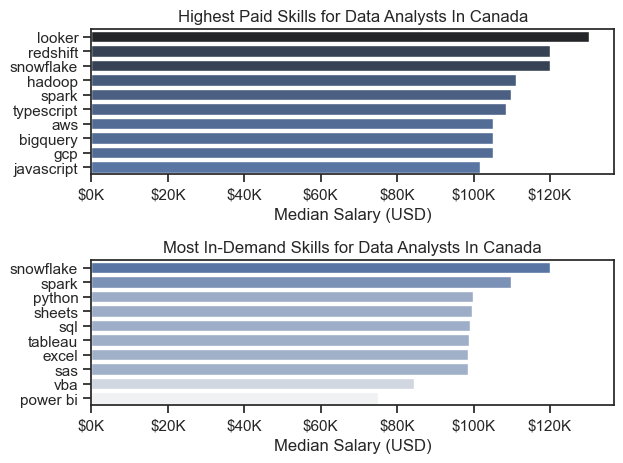

In [29]:
fig, ax = plt.subplots(2,1)


sns.set_theme(style="ticks")

sns.barplot(data=df_DA_toppay, x='median', y=df_DA_toppay.index, ax=ax[0], hue='median', palette= 'dark:b_r')
ax[0].legend().remove()


# df_DA_top_pay[::-1].plot(kind = 'barh', y='median', ax=ax[0], legend = False)
ax[0].set_title('Highest Paid Skills for Data Analysts In Canada')
ax[0].set_xlabel('Median Salary (USD)')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))




sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median', palette= 'light:b')
ax[1].legend().remove()
# df_DA_skills[::-1].plot(kind = 'barh', y='median', ax=ax[1], legend = False)
ax[1].set_title('Most In-Demand Skills for Data Analysts In Canada')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

fig.tight_layout()
plt.show()